# Project: Face Recognition using Convolutional Neural Networks (CNN)
**Author**: Nada Mohammed Alharbi  

# Introduction:
This project aims to develop a facial recognition model using Convolutional Neural Networks (CNN). The dataset used is the ORL face dataset, which contains 400 images of 40 individuals, with each individual represented by 10 images. The project involves several key steps, including data loading, preprocessing, training the CNN model, and evaluating its performance.



In [117]:
#Standard scientific Python imports
import numpy as np
import matplotlib.pyplot as plt

In [118]:
#Load data, face images and their target i.e. perosn number 
data = np.load("/kaggle/input/olivetti-faces/olivetti_faces.npy")
target = np.load("/kaggle/input/olivetti-faces-target/olivetti_faces_target.npy")

In [119]:
#print the size of data and target
#Data has 400 images of size 64 x 64 pixels (grayscale)
#Target has information about class of all 400 images
print(data.shape)
print(target.shape)

(400, 64, 64)
(400,)


In [120]:
#Identity number of unique persons (ids) in the trarget data 
#For ORL / Olivetti face dataset this there are 40 people
#The dataset contains 10 images of each person. Therefore 40 x 10 = 400 images
unique_ids=np.unique(target)
print(len(unique_ids))

40


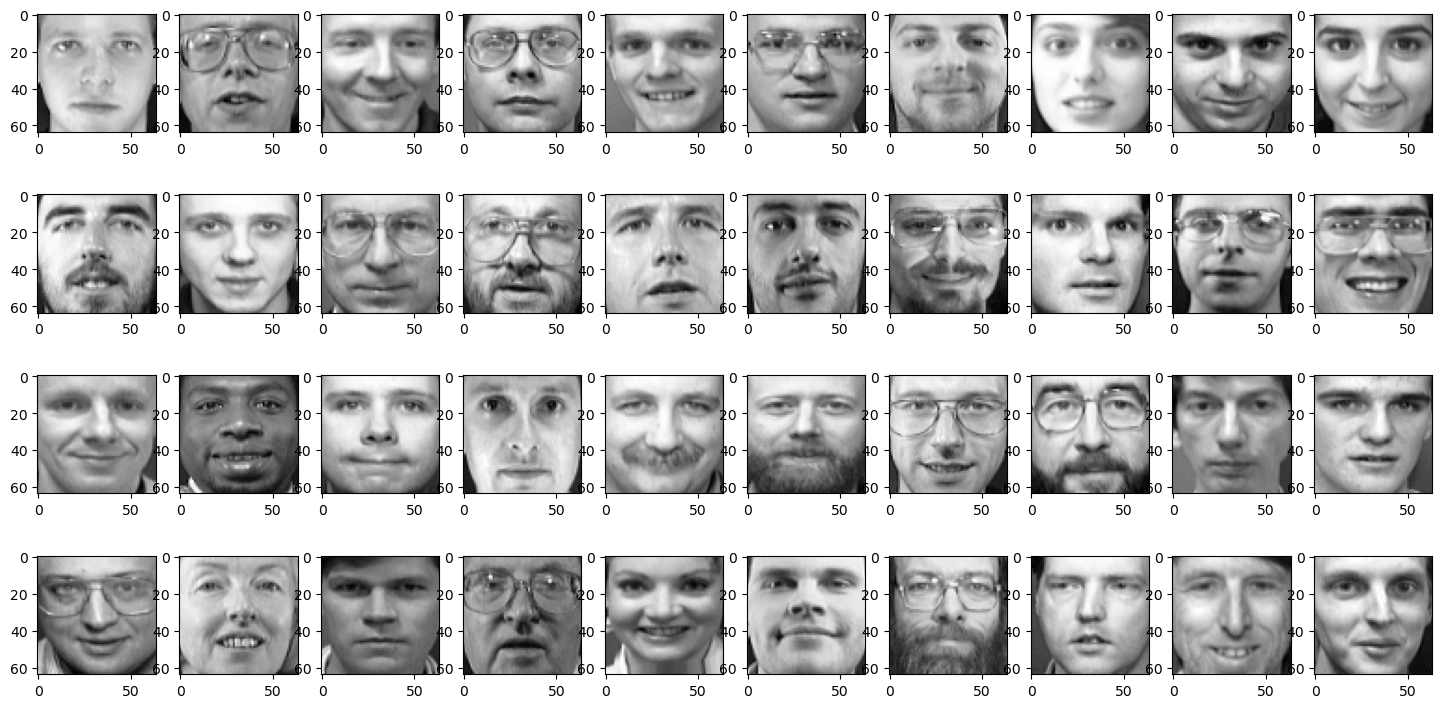

In [121]:
#Display one sample image for each person
#Display the 40 images in 4 rows with each row having 10 images
fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
axarr = axarr.flatten()
imgs=data
for id in unique_ids:
    img_id = id * 10
    axarr[id].imshow(imgs[img_id], cmap='gray')

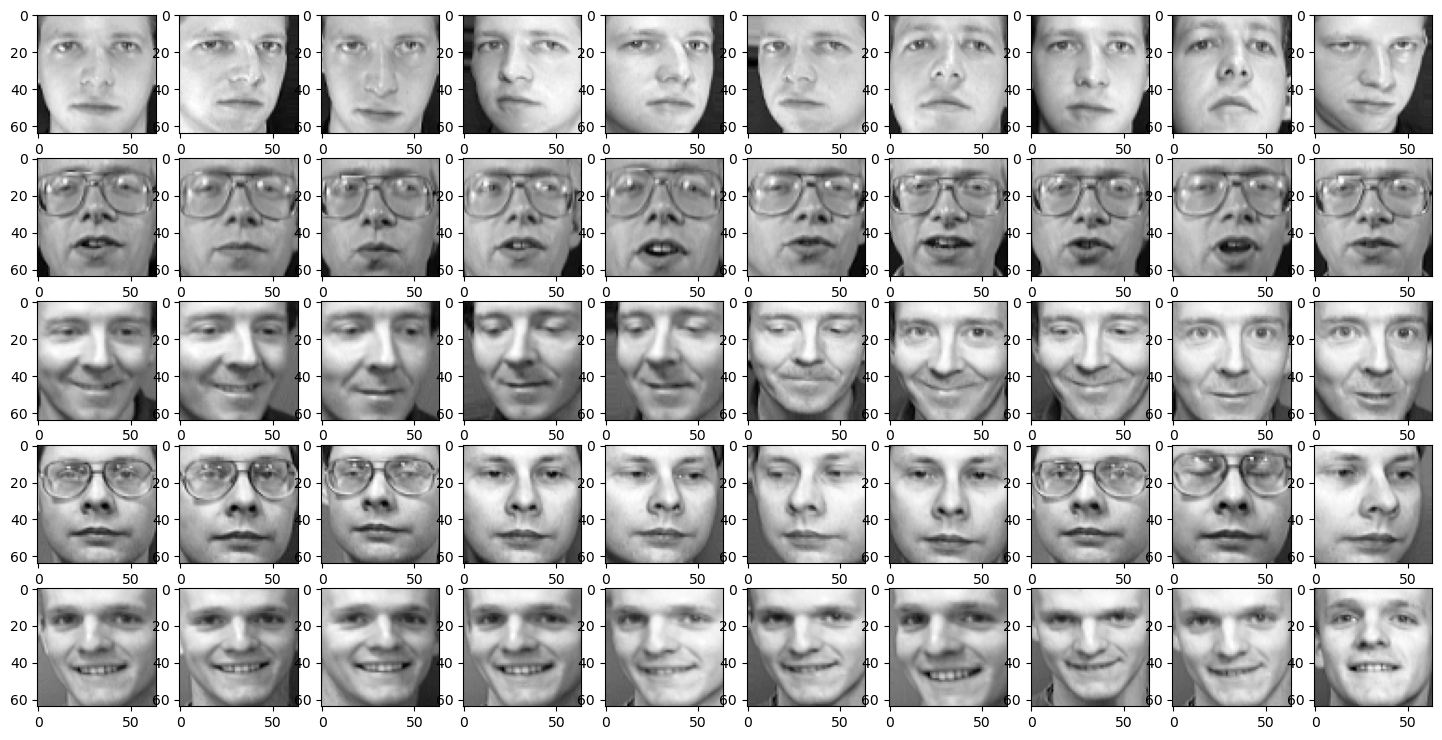

In [122]:
#Display all 10 images of first 5 people
cols = 10
subject_ids=[0, 1, 2, 3, 4]
rows = (len(subject_ids)*10)//cols
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))
for i, subject_ids in enumerate(subject_ids):
    for j in range(cols):
        img_id = subject_ids*10 + j
        axarr[i, j].imshow(imgs[img_id], cmap='gray')

In [123]:
#Import keras for building the Convolutional Neural Network
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

In [124]:
#Split the data into test and train data. Select test size = 20%
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
target = np.load("/kaggle/input/olivetti-faces-target/olivetti_faces_target.npy")
target = np_utils.to_categorical(target, len(np.unique(target)))

In [125]:
#Use sklearn library to split data into trianing and testing set
#X_train contains the image information and Y_train contains the target label (class)
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.2, random_state= 0)

In [126]:
#For training the data has to be split into training and validation, Split training data into training and validation set
#Set validation data size = 20% of training data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

In [127]:
#Remember the third dimension is important for keras so specify that third dimension is 1   
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

In [128]:
#Define the architecture of the convolutional neural network
model = Sequential()

#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(4, 4)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(4, 4)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
#Print a summary of the model
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 64, 64, 8)         208       
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 16, 16, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 16, 16, 16)        3216      
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_83 (Conv2D)          (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 2, 2, 32)       

In [130]:
#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

Epoch 1/10
8/8 [==============================] - 2s 76ms/step - loss: 3.8781 - accuracy: 0.0312 - val_loss: 3.7791 - val_accuracy: 0.0312
Epoch 2/10
8/8 [==============================] - 0s 47ms/step - loss: 3.7086 - accuracy: 0.0312 - val_loss: 3.8087 - val_accuracy: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 0s 49ms/step - loss: 3.6888 - accuracy: 0.0234 - val_loss: 3.8361 - val_accuracy: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 0s 48ms/step - loss: 3.6750 - accuracy: 0.0312 - val_loss: 3.8170 - val_accuracy: 0.0000e+00
Epoch 5/10
8/8 [==============================] - 0s 51ms/step - loss: 3.6721 - accuracy: 0.0352 - val_loss: 3.8037 - val_accuracy: 0.0000e+00
Epoch 6/10
8/8 [==============================] - 0s 49ms/step - loss: 3.6682 - accuracy: 0.0273 - val_loss: 3.7956 - val_accuracy: 0.0156
Epoch 7/10
8/8 [==============================] - 0s 48ms/step - loss: 3.6612 - accuracy: 0.0352 - val_loss: 3.7867 - val_accuracy: 0.0000e+00
Epoch 8

In [131]:
#Question 4:
#Define the architecture of the convolutional neural network
model = Sequential()

#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

Epoch 1/10
8/8 [==============================] - 2s 105ms/step - loss: 3.8676 - accuracy: 0.0195 - val_loss: 3.7754 - val_accuracy: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 1s 75ms/step - loss: 3.7016 - accuracy: 0.0273 - val_loss: 3.8478 - val_accuracy: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 1s 75ms/step - loss: 3.6674 - accuracy: 0.0352 - val_loss: 3.7991 - val_accuracy: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 1s 75ms/step - loss: 3.6490 - accuracy: 0.0469 - val_loss: 3.7737 - val_accuracy: 0.0312
Epoch 5/10
8/8 [==============================] - 1s 83ms/step - loss: 3.6469 - accuracy: 0.0234 - val_loss: 3.7247 - val_accuracy: 0.0312
Epoch 6/10
8/8 [==============================] - 1s 74ms/step - loss: 3.6068 - accuracy: 0.1172 - val_loss: 3.6670 - val_accuracy: 0.1094
Epoch 7/10
8/8 [==============================] - 1s 74ms/step - loss: 3.5429 - accuracy: 0.1211 - val_loss: 3.5999 - val_accuracy: 0.1562
Epoch 8/10
8/8

In [132]:
#Question 5:
#Define the architecture of the convolutional neural network
model = Sequential()

#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=24, epochs=18, verbose=1)

Epoch 1/18
11/11 [==============================] - 2s 78ms/step - loss: 3.9182 - accuracy: 0.0156 - val_loss: 3.8443 - val_accuracy: 0.0000e+00
Epoch 2/18
11/11 [==============================] - 1s 59ms/step - loss: 3.7063 - accuracy: 0.0234 - val_loss: 3.7632 - val_accuracy: 0.0312
Epoch 3/18
11/11 [==============================] - 1s 58ms/step - loss: 3.6704 - accuracy: 0.0312 - val_loss: 3.7559 - val_accuracy: 0.0156
Epoch 4/18
11/11 [==============================] - 1s 59ms/step - loss: 3.6373 - accuracy: 0.0625 - val_loss: 3.7532 - val_accuracy: 0.0781
Epoch 5/18
11/11 [==============================] - 1s 58ms/step - loss: 3.5518 - accuracy: 0.1172 - val_loss: 3.6107 - val_accuracy: 0.1094
Epoch 6/18
11/11 [==============================] - 1s 61ms/step - loss: 3.4008 - accuracy: 0.2227 - val_loss: 3.3615 - val_accuracy: 0.3281
Epoch 7/18
11/11 [==============================] - 1s 60ms/step - loss: 3.0658 - accuracy: 0.3633 - val_loss: 2.9259 - val_accuracy: 0.4219
Epoch 8/1

In [133]:
#Question 6:
#X_train contains the image information and Y_train contains the target label (class)
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.3, random_state= 0)

#Set validation data size = 30% of training data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 0)

#Define the architecture of the convolutional neural network
model = Sequential()

#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(8, (5, 5), activation='tanh', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(16, (5, 5), activation='tanh', padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(32, (3, 3), activation='tanh', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

Epoch 1/10
7/7 [==============================] - 2s 117ms/step - loss: 3.8529 - accuracy: 0.0306 - val_loss: 3.8169 - val_accuracy: 0.0119
Epoch 2/10
7/7 [==============================] - 1s 81ms/step - loss: 3.6323 - accuracy: 0.0459 - val_loss: 3.9540 - val_accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 1s 75ms/step - loss: 3.5691 - accuracy: 0.0918 - val_loss: 3.9262 - val_accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 1s 75ms/step - loss: 3.5422 - accuracy: 0.0663 - val_loss: 3.9433 - val_accuracy: 0.0595
Epoch 5/10
7/7 [==============================] - 1s 73ms/step - loss: 3.4813 - accuracy: 0.1122 - val_loss: 3.8548 - val_accuracy: 0.1190
Epoch 6/10
7/7 [==============================] - 1s 88ms/step - loss: 3.3763 - accuracy: 0.2041 - val_loss: 3.7794 - val_accuracy: 0.0595
Epoch 7/10
7/7 [==============================] - 1s 76ms/step - loss: 3.2248 - accuracy: 0.1939 - val_loss: 3.6608 - val_accuracy: 0.1190
Epoch 8/10
7/7 [==

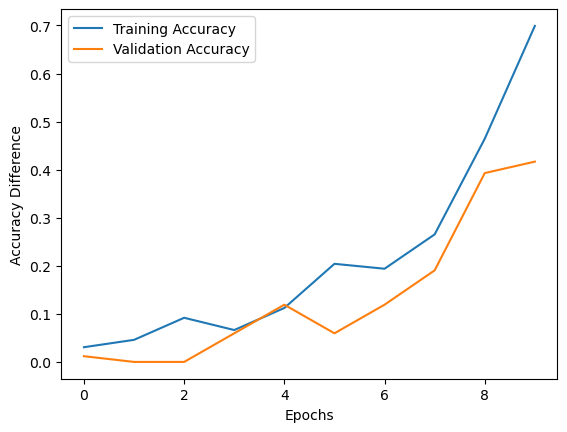

In [134]:
#Question 7: 
#Extract the training and validation accuracy values from the history object
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

#Compute the difference between the training and validation accuracy for each epoch
diff_acc = [train_acc[i] - val_acc[i] for i in range(len(train_acc))]

#Plot the training and validation accuracy curves
epochs = range(1, len(train_acc) + 1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy Difference')

#Plot the training and validation accuracy curves
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

Epoch 1/10
13/13 [==============================] - 2s 61ms/step - loss: 3.7688 - accuracy: 0.0357 - val_loss: 3.9268 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 1s 43ms/step - loss: 3.6530 - accuracy: 0.0510 - val_loss: 4.0197 - val_accuracy: 0.0119
Epoch 3/10
13/13 [==============================] - 1s 45ms/step - loss: 3.5996 - accuracy: 0.0408 - val_loss: 3.9657 - val_accuracy: 0.0357
Epoch 4/10
13/13 [==============================] - 1s 43ms/step - loss: 3.4748 - accuracy: 0.1480 - val_loss: 3.8206 - val_accuracy: 0.0476
Epoch 5/10
13/13 [==============================] - 1s 44ms/step - loss: 3.2363 - accuracy: 0.1837 - val_loss: 3.5570 - val_accuracy: 0.2143
Epoch 6/10
13/13 [==============================] - 1s 44ms/step - loss: 2.5173 - accuracy: 0.4235 - val_loss: 2.8817 - val_accuracy: 0.3690
Epoch 7/10
13/13 [==============================] - 1s 44ms/step - loss: 1.6871 - accuracy: 0.6990 - val_loss: 2.2916 - val_accuracy: 0.5714
Epoch 8/1

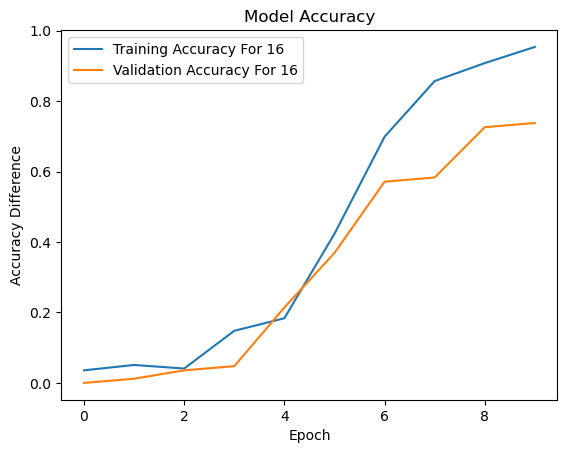

In [144]:
#Question 8: (batch_size=16) 
#Define the architecture of the convolutional neural network
model = Sequential()

#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=10, verbose=1)

#Plot the training and validation accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy Difference')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy For 16', 'Validation Accuracy For 16'], loc='upper left')
plt.show()

Epoch 1/10
7/7 [==============================] - 2s 130ms/step - loss: 3.8265 - accuracy: 0.0153 - val_loss: 3.8351 - val_accuracy: 0.0357
Epoch 2/10
7/7 [==============================] - 1s 93ms/step - loss: 3.6482 - accuracy: 0.0306 - val_loss: 3.9640 - val_accuracy: 0.0357
Epoch 3/10
7/7 [==============================] - 1s 72ms/step - loss: 3.6223 - accuracy: 0.0408 - val_loss: 3.9405 - val_accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 0s 70ms/step - loss: 3.6177 - accuracy: 0.0408 - val_loss: 3.9430 - val_accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 1s 74ms/step - loss: 3.6023 - accuracy: 0.0255 - val_loss: 3.9715 - val_accuracy: 0.0238
Epoch 6/10
7/7 [==============================] - 1s 73ms/step - loss: 3.5794 - accuracy: 0.0765 - val_loss: 3.9900 - val_accuracy: 0.0119
Epoch 7/10
7/7 [==============================] - 1s 73ms/step - loss: 3.5432 - accuracy: 0.0612 - val_loss: 4.0250 - val_accuracy: 0.0476
Epoch 8/10
7/7 [==

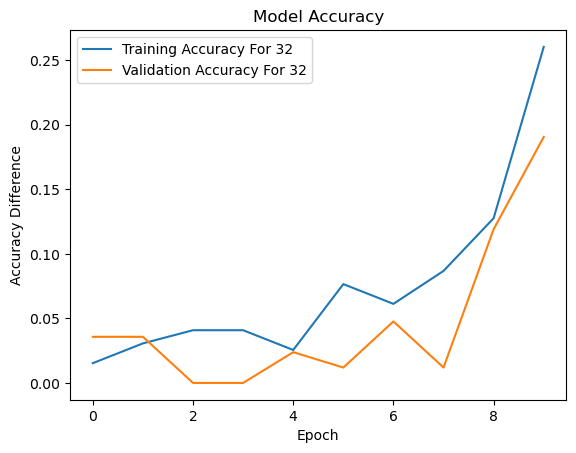

In [148]:
#Question 8: (batch_size=32) 
#Define the architecture of the convolutional neural network
model = Sequential()

#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

#Plot the training and validation accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy Difference')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy For 32', 'Validation Accuracy For 32'], loc='upper left')
plt.show()

In [150]:
#Question 9: 
#Define the architecture of the convolutional neural network
model = Sequential()

#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the model for 5 epochs and record the final validation accuracy
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=5, verbose=1)
val_acc_5 = model.evaluate(X_test, Y_test, verbose=0)[1]

# Train the model for 10 epochs and record the final validation accuracy
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)
val_acc_10 = model.evaluate(X_test, Y_test, verbose=0)[1]

# Train the model for 20 epochs and record the final validation accuracy
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=20, verbose=1)
val_acc_20 = model.evaluate(X_test, Y_test, verbose=0)[1]

#Print the final validation accuracy for each number of epochs
print('Validation accuracy after 5 epochs:', val_acc_5)
print('Validation accuracy after 10 epochs:', val_acc_10)
print('Validation accuracy after 20 epochs:', val_acc_20)

Epoch 1/5
7/7 [==============================] - 2s 109ms/step - loss: 3.8092 - accuracy: 0.0357 - val_loss: 3.8461 - val_accuracy: 0.0357
Epoch 2/5
7/7 [==============================] - 1s 73ms/step - loss: 3.6404 - accuracy: 0.0357 - val_loss: 3.9852 - val_accuracy: 0.0000e+00
Epoch 3/5
7/7 [==============================] - 1s 73ms/step - loss: 3.6249 - accuracy: 0.0561 - val_loss: 4.0136 - val_accuracy: 0.0000e+00
Epoch 4/5
7/7 [==============================] - 0s 71ms/step - loss: 3.5880 - accuracy: 0.0408 - val_loss: 3.9469 - val_accuracy: 0.0000e+00
Epoch 5/5
7/7 [==============================] - 1s 76ms/step - loss: 3.5731 - accuracy: 0.0408 - val_loss: 3.9967 - val_accuracy: 0.0119
Epoch 1/10
7/7 [==============================] - 1s 84ms/step - loss: 3.5205 - accuracy: 0.0816 - val_loss: 3.9454 - val_accuracy: 0.0119
Epoch 2/10
7/7 [==============================] - 1s 76ms/step - loss: 3.4653 - accuracy: 0.0816 - val_loss: 3.9428 - val_accuracy: 0.0476
Epoch 3/10
7/7 [===

Epoch 1/10
9/9 [==============================] - 2s 84ms/step - loss: 3.9216 - accuracy: 0.0139 - val_loss: 3.9065 - val_accuracy: 0.0312
Epoch 2/10
9/9 [==============================] - 0s 53ms/step - loss: 3.6671 - accuracy: 0.0417 - val_loss: 3.9189 - val_accuracy: 0.0417
Epoch 3/10
9/9 [==============================] - 0s 57ms/step - loss: 3.6334 - accuracy: 0.0208 - val_loss: 3.9301 - val_accuracy: 0.0208
Epoch 4/10
9/9 [==============================] - 0s 51ms/step - loss: 3.5901 - accuracy: 0.0486 - val_loss: 3.9192 - val_accuracy: 0.0521
Epoch 5/10
9/9 [==============================] - 0s 49ms/step - loss: 3.5604 - accuracy: 0.0486 - val_loss: 3.9252 - val_accuracy: 0.0625
Epoch 6/10
9/9 [==============================] - 1s 59ms/step - loss: 3.4816 - accuracy: 0.1181 - val_loss: 3.8823 - val_accuracy: 0.0208
Epoch 7/10
9/9 [==============================] - 0s 51ms/step - loss: 3.3689 - accuracy: 0.1597 - val_loss: 3.7619 - val_accuracy: 0.1458
Epoch 8/10
9/9 [===========

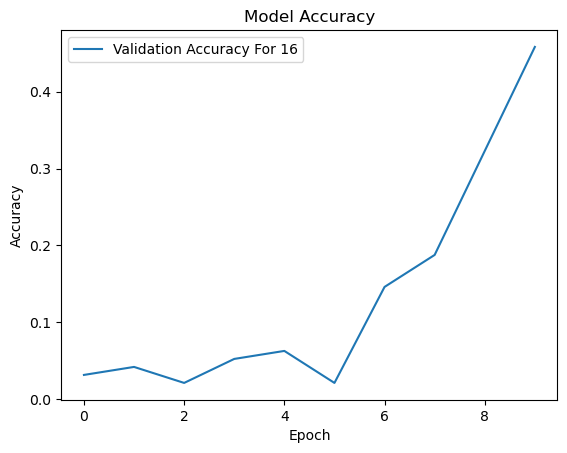

In [153]:
#Question 10: (batch_size=16) 
#X_train contains the image information and Y_train contains the target label (class)
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.4, random_state= 0)

#Set validation data size = 40% of training data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.4, random_state = 0)

#Define the architecture of the convolutional neural network
model = Sequential()

#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=10, verbose=1)

#Plot the validation accuracy
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation Accuracy For 16'], loc='upper left')
plt.show()

Epoch 1/10
5/5 [==============================] - 2s 128ms/step - loss: 3.8652 - accuracy: 0.0069 - val_loss: 3.7522 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 82ms/step - loss: 3.6506 - accuracy: 0.0417 - val_loss: 3.9060 - val_accuracy: 0.0625
Epoch 3/10
5/5 [==============================] - 0s 82ms/step - loss: 3.6270 - accuracy: 0.0139 - val_loss: 3.9110 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 0s 86ms/step - loss: 3.5942 - accuracy: 0.0417 - val_loss: 3.8543 - val_accuracy: 0.0312
Epoch 5/10
5/5 [==============================] - 0s 81ms/step - loss: 3.5735 - accuracy: 0.0625 - val_loss: 3.8639 - val_accuracy: 0.0417
Epoch 6/10
5/5 [==============================] - 0s 83ms/step - loss: 3.5459 - accuracy: 0.0903 - val_loss: 3.8738 - val_accuracy: 0.0833
Epoch 7/10
5/5 [==============================] - 0s 93ms/step - loss: 3.5204 - accuracy: 0.1319 - val_loss: 3.8738 - val_accuracy: 0.0938
Epoch 8/10
5/5 [==

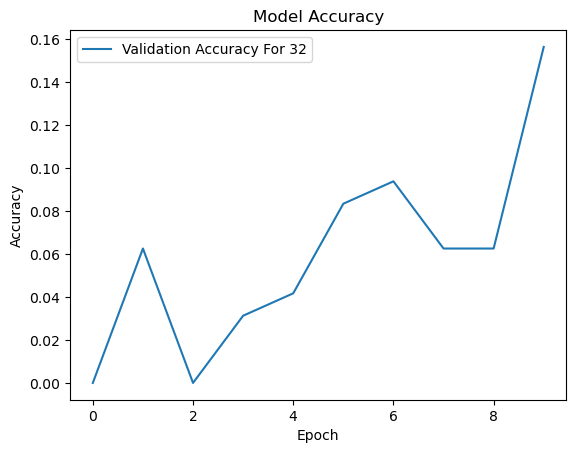

In [155]:
#Question 10: (batch_size=32) 
#X_train contains the image information and Y_train contains the target label (class)
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.4, random_state= 0)

#Set validation data size = 40% of training data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.4, random_state = 0)

#Define the architecture of the convolutional neural network
model = Sequential()

#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

#Plot the validation accuracy
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation Accuracy For 32'], loc='upper left')
plt.show()